In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

import caffe

from lib import run_net
from lib import score_util
from lib import plot_util

from datasets.youtube import youtube
from datasets.pascal_voc import pascal

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['figure.figsize'] = (12, 12)

Configure Caffe

In [2]:
caffe.set_device(0)
caffe.set_mode_gpu()

PASCAL VOC details

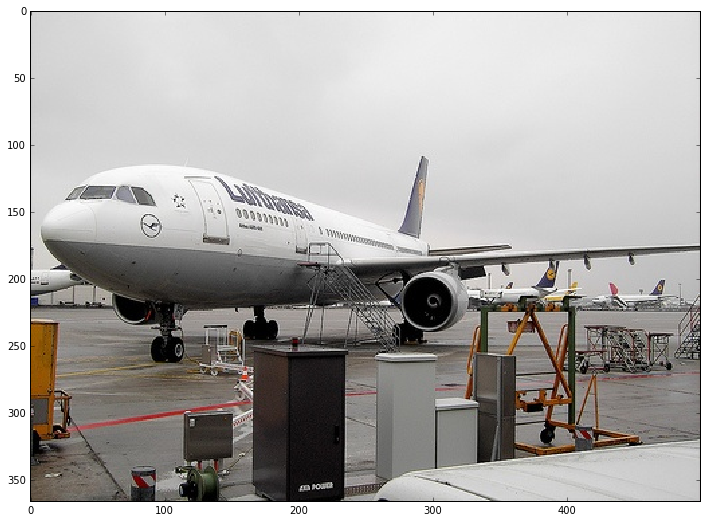

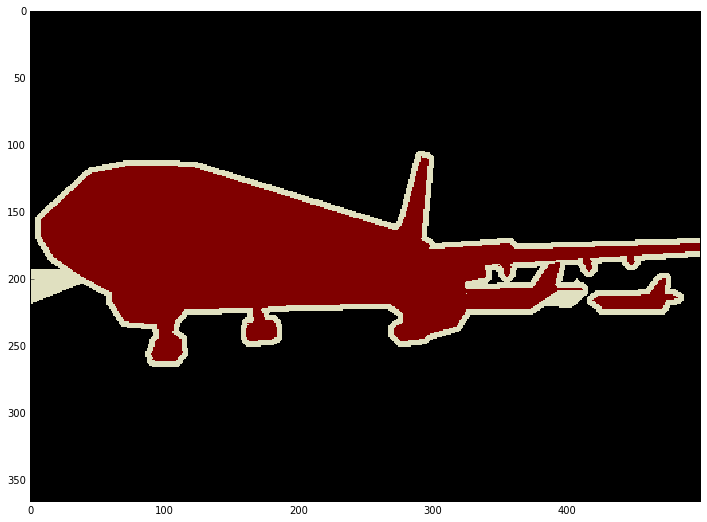

In [3]:
PV = pascal('/x/PASCAL/VOC2011')
voc_train = open('{}/ImageSets/Segmentation/train.txt'.format(PV.dir)).read().splitlines()
voc_val = open('{}/ImageSets/Segmentation/val.txt'.format(PV.dir)).read().splitlines()

# demo
plt.imshow(PV.load_image(voc_val[0]))
plt.figure()
plt.imshow(PV.palette(PV.load_label(voc_val[0])))

Youtube-Objects details

('aeroplane', '0010', '001', 1)


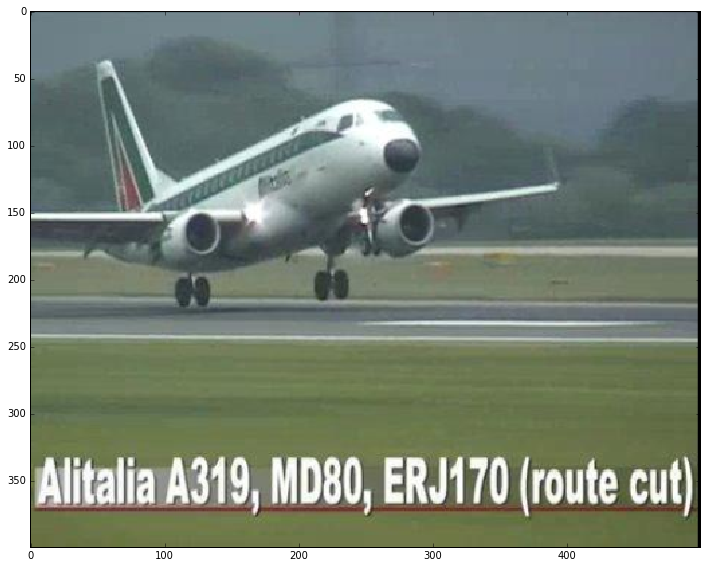

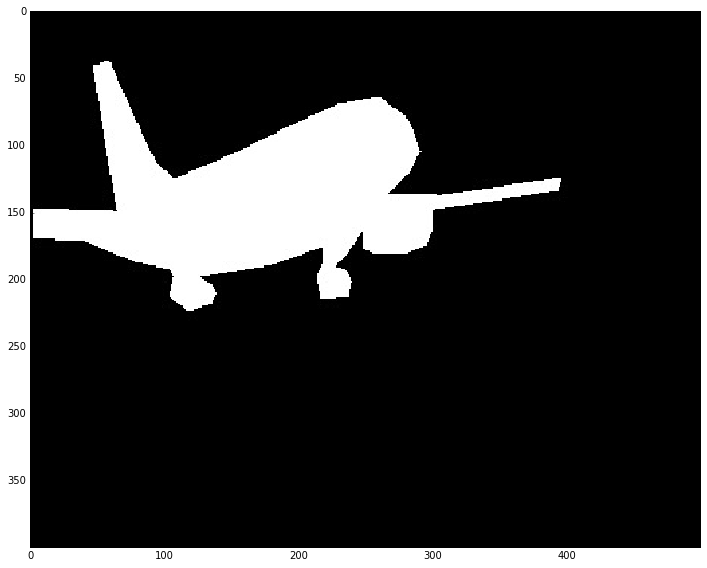

In [4]:
YT = youtube('/x/youtube/')
class_ = 'aeroplane'
vids = YT.list_label_vids('aeroplane')
shots = YT.list_label_shots(class_, vids[0])
frames = YT.list_label_frames(class_, vids[0], shots[0])
print (class_, vids[0], shots[0], frames[0])
im, label = YT.load_frame(class_, vids[0], shots[0], frames[0]), YT.load_label(class_, vids[0], shots[0], frames[0])
plt.imshow(im)
plt.figure()
plt.imshow(label)

Load fcn8s and sanity check on a PASCAL VOC image and a Youtube-Objects frame

In [5]:
net = caffe.Net('../nets/voc-fcn8s.prototxt', '../nets/voc-fcn8s-heavy.caffemodel', caffe.TEST)

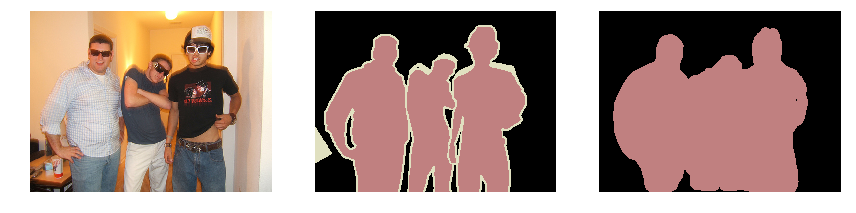

In [6]:
idx = random.choice(voc_val)
im, label = PV.load_image(idx), PV.load_label(idx)

out = run_net.segrun(net, PV.preprocess(im))
plot_util.segshow(im, PV.palette(label[0]), PV.palette(out))

bird


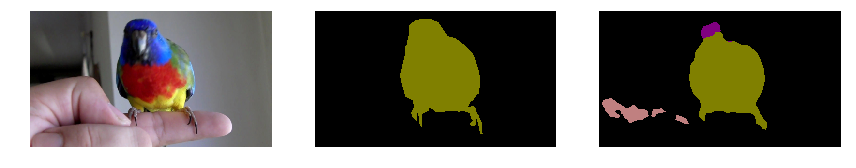

In [7]:
class_ = random.choice(YT.classes[1:])
print class_
vid = random.choice(YT.list_label_vids(class_))
shot = random.choice(YT.list_label_shots(class_, vid))
frame = random.choice(YT.list_label_frames(class_, vid, shot))
im, label = YT.load_frame(class_, vid, shot, frame), YT.load_label(class_, vid, shot, frame)
label = YT.convert_yt2voc_label(label, class_, PV.classes)

out = run_net.segrun(net, YT.preprocess(im))
plot_util.segshow(im, PV.palette(label[0]), PV.palette(out))

Inspect output on Youtube video

/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


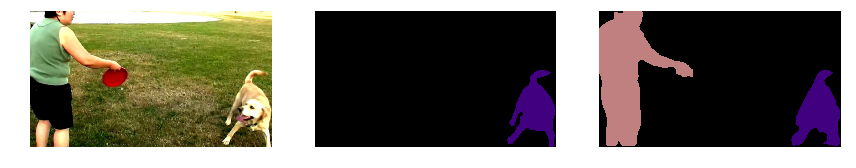

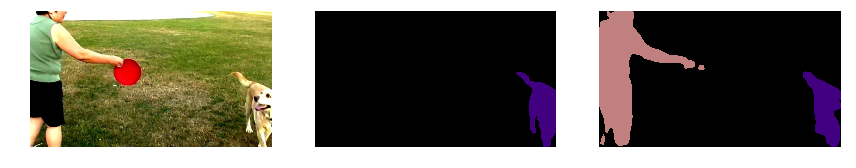

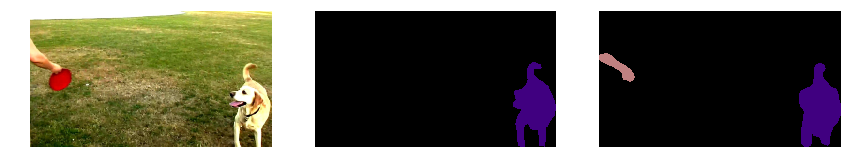

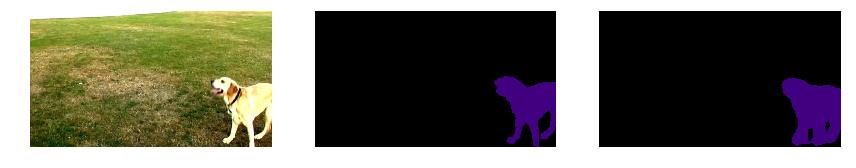

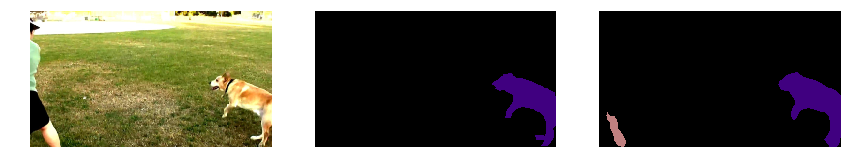

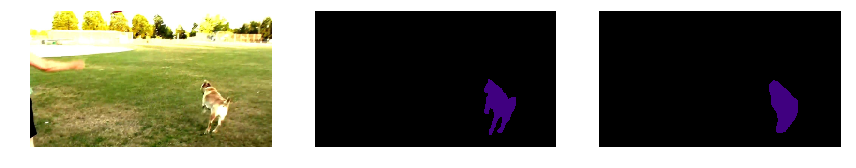

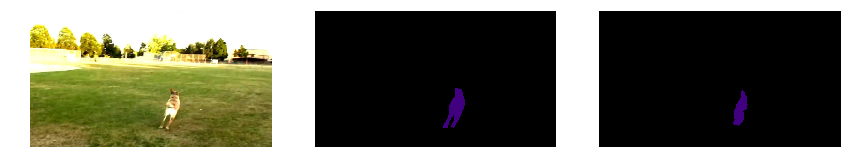

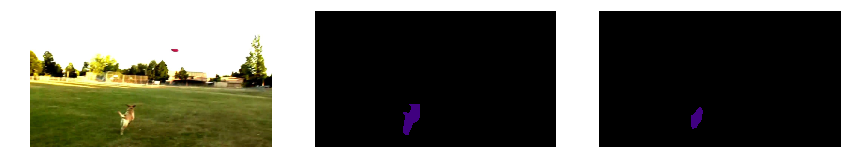

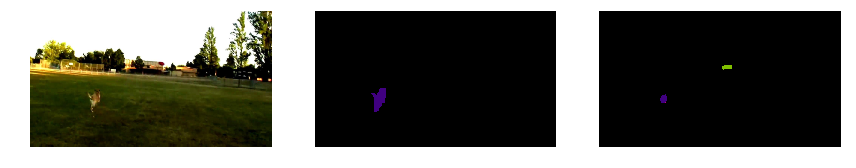

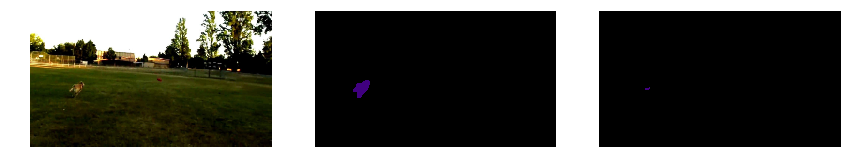

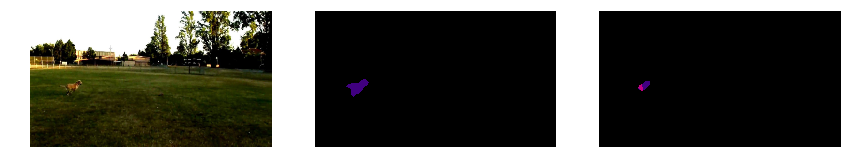

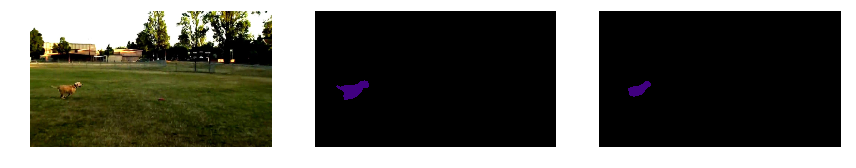

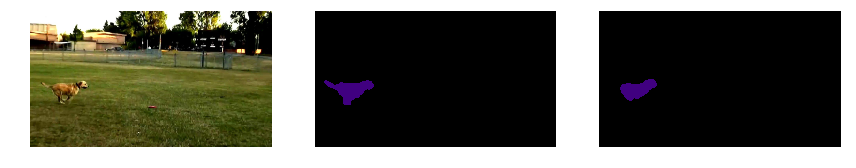

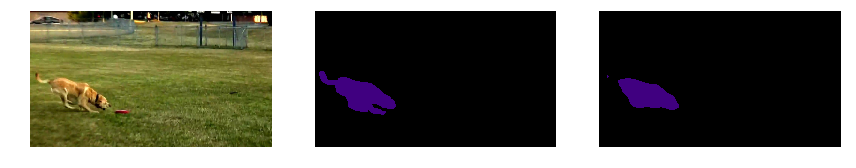

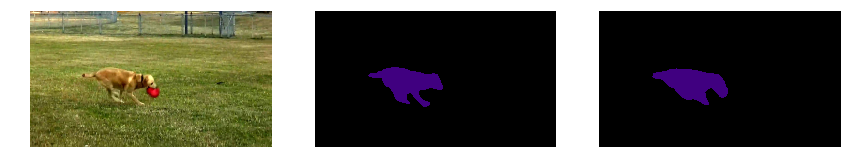

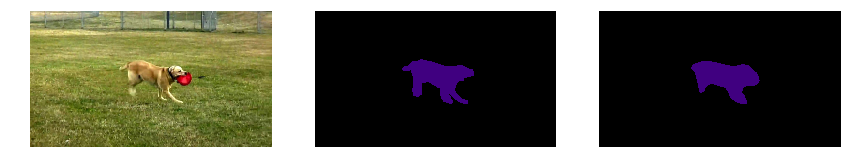

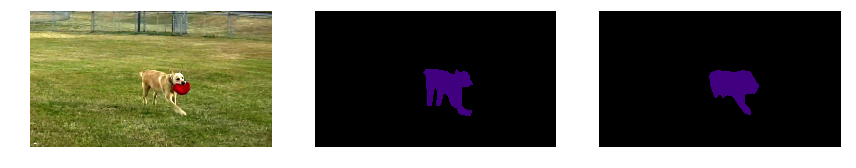

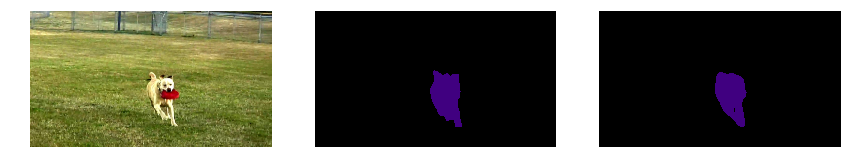

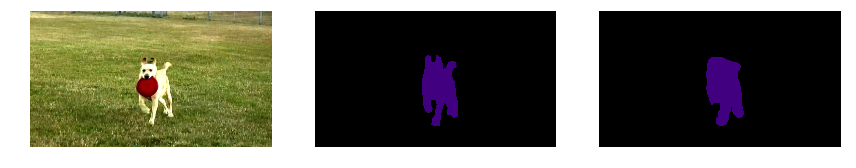

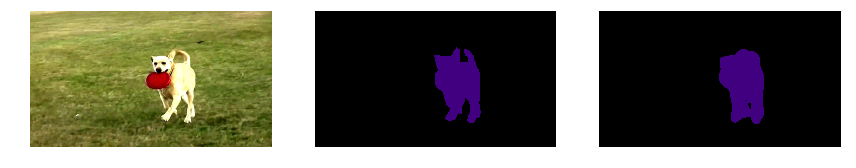

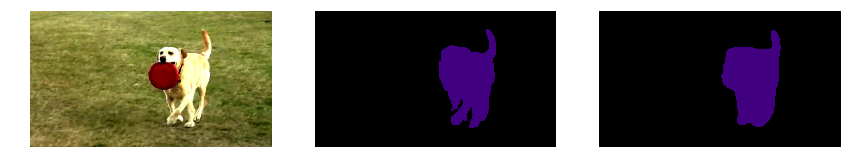

In [8]:
class_ = 'dog'
vid = '0023'
shot = '001'

for f in YT.list_label_frames(class_, vid, shot):
    im, label = YT.load_frame(class_, vid, shot, f), YT.load_label(class_, vid, shot, f)
    label = YT.convert_yt2voc_label(label, class_, PV.classes)
    out = run_net.segrun(net, YT.preprocess(im))
    plot_util.segshow(im, PV.palette(label[0]), PV.palette(out))